In [3]:
import matplotlib.pyplot as plt
from quickndirtybot import io
from quickndirtybot.strategies import minmax
from quickndirtybot import backtest

Index(['time', 'open', 'highest', 'lowest', 'closing', 'volume', 'sma-hi-now',
       'sma-lo-now', 'sma-hi-prev', 'sma-lo-prev', 'min-hi-prev',
       'max-lo-prev', 'max/min', 'buy', 'sell', 'USD', 'BTC', 'dUSD', 'dBTC',
       'tot_USD', 'tot_USD_cons', 'tot_BTC', 'return_on_inv_perc'],
      dtype='object')


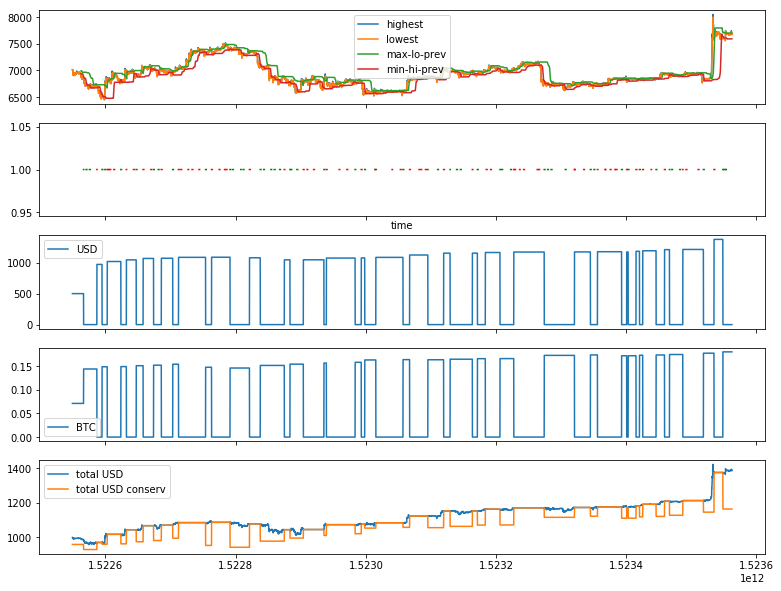

--------------------
end balance: 0.00 USD + 0.18053 BTC which equates 1386.38 USD or 0.18053 BTC
further results
{'investment': 999.9996434950322, 'return_on_inv_perc': 38.63833567020678, 'roi_per_day': 2.8253526216189817, 'nrbuys': 986.0, 'nrsells': 1055.0, 'transactions': 53, 'buy_hold': 9.514112595596735, 'vs_buy_hold': 29.124223074610043, 'vs_buy_hold_per_day': 2.0472634678808888}


In [4]:
# plot performance of minmax
minmaxpars_smaperiod = 20
minmaxpars_minmaxperiod = 180
minmaxpars_threshold = 1.0001
minmaxpars_takerfee = 0.003

# enablo zooming into fig
%matplotlib inline
import mpld3
mpld3.enable_notebook()

data = io.load_csv('../data/gdax_data.csv')
df = io.pandize_csv(data)

minmax.measure(df, smaperiod=minmaxpars_smaperiod, minmaxperiod=minmaxpars_minmaxperiod)
minmax.findbuy(df, thresh_maxovermin=minmaxpars_threshold)
minmax.findsell(df, thresh_maxovermin=minmaxpars_threshold)

backtest.set_start_funds(df, 1000, True)
backtest.backtest(df, amount_buy=5, amount_sell=5, taker_fee=minmaxpars_takerfee)
results = backtest.diagnose(df)

# output
print(df.columns)
# print(df)
# fig = plt.gcf()
# ax = plt.gca()

fig, ax = plt.subplots(nrows=5, sharex=True)
# subplot 0: prices
ax[0].plot(df['time'], df['highest'], label='highest')
ax[0].plot(df['time'], df['lowest'], label='lowest')
ax[0].plot(df['time'], df['max-lo-prev'], label='max-lo-prev')
ax[0].plot(df['time'], df['min-hi-prev'], label='min-hi-prev')
ax[0].legend()
# subplot 1: buy/sell decisions
ax[1].plot(df['time'], df['buy'], color='g')
ax[1].plot(df['time'], df['sell'], color='r')
ax[1].set_xlabel('time')
# subplot 2: USD funds
ax[2].plot(df['time'], df['USD'], label='USD')
ax[2].legend()
# subplot 3: BTC funds
# ax2r = ax[2].twinx()
# ax2r.plot(df['time'], df['BTC'], label='BTC')
ax[3].plot(df['time'], df['BTC'], label='BTC')
ax[3].legend()
# subplot 4: total depot value
ax[4].plot(df['time'], df['tot_USD'], label='total USD')
ax[4].plot(df['time'], df['tot_USD_cons'], label='total USD conserv')
ax[4].legend()
fig.set_size_inches(13, 10)

plt.show()

print('-'*20)
endUSD = df.loc[len(df)-1, 'USD']
endBTC = df.loc[len(df)-1, 'BTC']
endtotUSD =  df.loc[len(df)-1, 'tot_USD']
endtotBTC =  df.loc[len(df)-1, 'tot_BTC']

print('end balance: {:.2f} USD + {:.5f} BTC'.format(endUSD, endBTC),
      'which equates {:.2f} USD or {:.5f} BTC'.format(endtotUSD, endtotBTC))
print('further results')
print(results)

In [ ]:
# test through various minmax parameters

# %matplotlib notebook
# find parameters
data_all = load_data('gdax_data.csv')
data_split = split_data(data_all, 8)

smaperiods = [1, 2, 3, 5, 10, 15, 20, 40, 60, 120, 240]
minmaxperiods = [2, 5, 10, 20, 30, 60, 120, 180, 240, 300, 400]

roi_results = {}
for smaperiod in smaperiods:
    empt = {'minmaxperiods': [], 'roi_per_day': [], 'transactions':[], 'vs_buy_hold_per_day':[]}
    roi_results[smaperiod] = {'minmaxperiods': [], 'roi_per_day': [], 'transactions':[], 'vs_buy_hold_per_day':[]}
    roi_results[smaperiod]['means'] = {'minmaxperiods': [], 'roi_per_day': [], 'transactions':[], 'vs_buy_hold_per_day':[]}
    for minmaxperiod in minmaxperiods:
        roipd = []
        trans = []
        vsbh = []
        for data in data_split:
            df = pandize_data(data)
            df['USD'] = 0
            df.loc[0, 'USD'] = 500
            df['BTC'] = 0
            df.loc[0, 'BTC'] = df.loc[0, 'USD'] / ((df.loc[0, 'highest'] + df.loc[0, 'lowest'])/2)
            strat_minmax_measure(df, smaperiod=smaperiod, minmaxperiod=minmaxperiod)
            strat_minmax_findbuy(df, thresh_maxovermin=1.0001)
            strat_minmax_findsell(df, thresh_maxovermin=1.0001)
            backtest_trend(df, amount_buy=5, amount_sell=5)
            results = diagnose(df)
            roi_results[smaperiod]['minmaxperiods'].append(minmaxperiod)
            roi_results[smaperiod]['roi_per_day'].append(results['roi_per_day'])
            roi_results[smaperiod]['transactions'].append(results['transactions'])
            roi_results[smaperiod]['vs_buy_hold_per_day'].append(results['vs_buy_hold_per_day'])
            roipd.append(results['roi_per_day'])
            trans.append(results['transactions'])
            vsbh.append(results['vs_buy_hold_per_day'])
        roi_results[smaperiod]['means']['roi_per_day'].append(np.mean(roipd))
        roi_results[smaperiod]['means']['transactions'].append(np.mean(trans))
        roi_results[smaperiod]['means']['vs_buy_hold_per_day'].append(np.mean(vsbh))
    print('done sma', smaperiod)